 # Importing necessary Libraries

In [47]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# Importing Dataset (Train Data and Test Data)

In [38]:
train_data = pd.read_csv('Data/fraudTrain.csv')

test_data = pd.read_csv('Data/fraudTest.csv')

In [39]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [40]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [41]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [42]:
test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_data.isnull().sum()

# Data Visualization

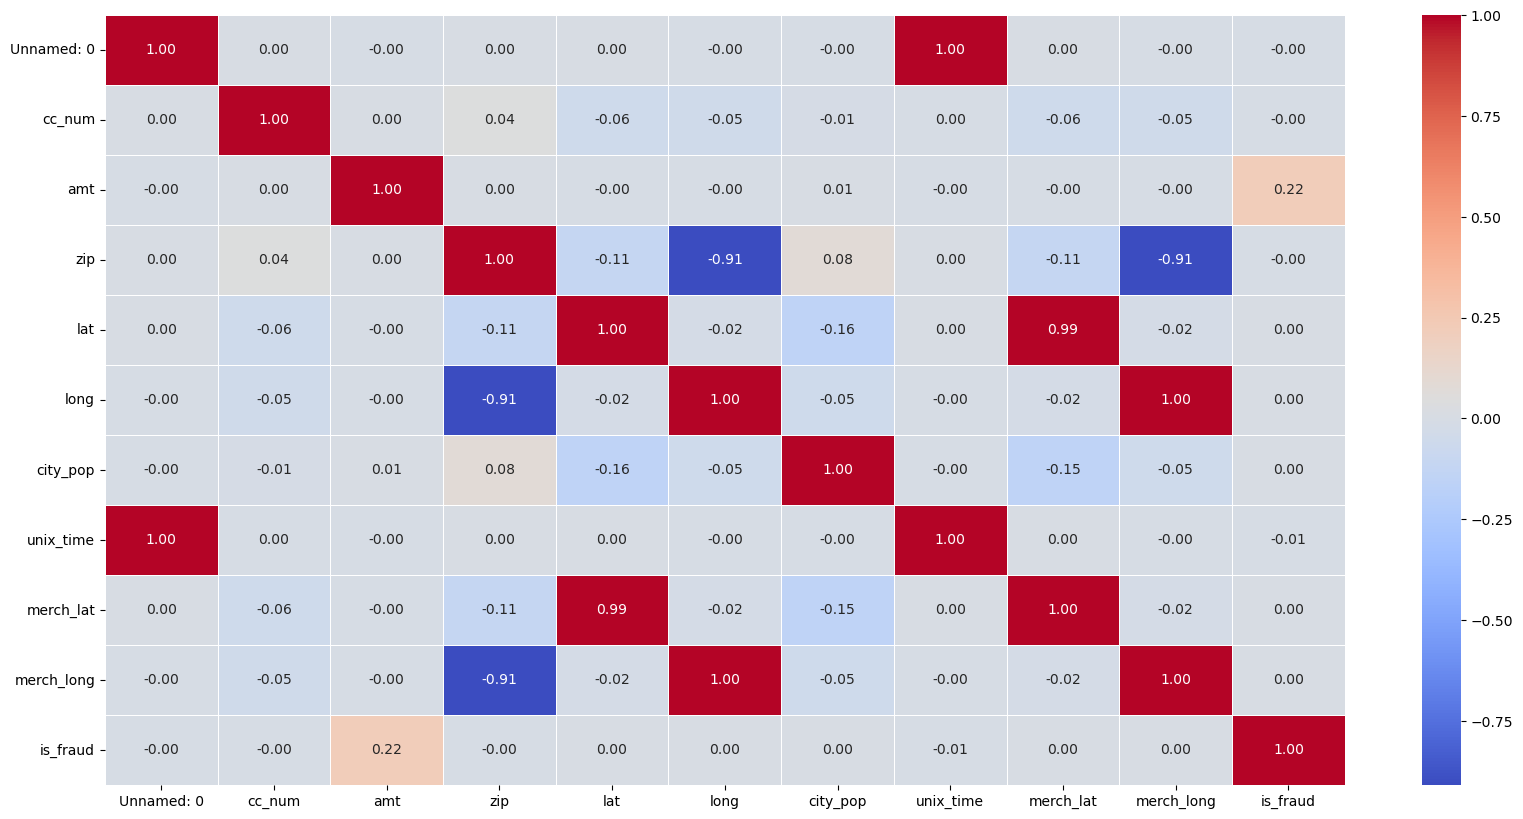

In [44]:
# Excluding non-numeric columns
numeric_df = train_data.select_dtypes(include=['number'])

# Plotting the correlation heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=ax)
plt.show()


# Who was scammed the most?

In [45]:
train_data.loc[train_data['is_fraud']==1].sort_values('amt',ascending = False).head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1262544,1262544,2020-06-08 22:14:13,3562793934111141,fraud_Kuhn LLC,shopping_pos,1376.04,Meagan,Edwards,F,10376 Bullock Rapid,...,38.9456,-75.9777,777,Television production assistant,1997-04-17,9a7f96694d672499c10b6085fadecd30,1370729653,38.004592,-75.446751,1


Text(0, 0.5, 'Number of Frauds')

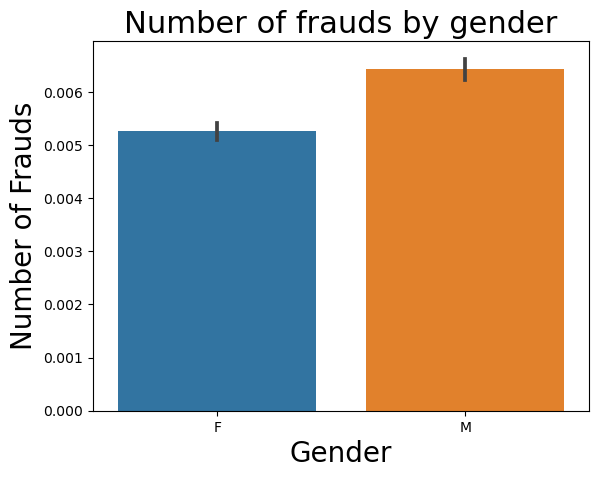

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure()
plt.title('Number of frauds by gender',fontsize=22)
sns.barplot(x="gender", y='is_fraud' ,data=train_data)

plt.xlabel('Gender', fontsize=20)
plt.ylabel('Number of Frauds', fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'misc_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'entertainment'),
  Text(3, 0, 'gas_transport'),
  Text(4, 0, 'misc_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'shopping_net'),
  Text(7, 0, 'shopping_pos'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'personal_care'),
  Text(10, 0, 'health_fitness'),
  Text(11, 0, 'travel'),
  Text(12, 0, 'kids_pets'),
  Text(13, 0, 'home')])

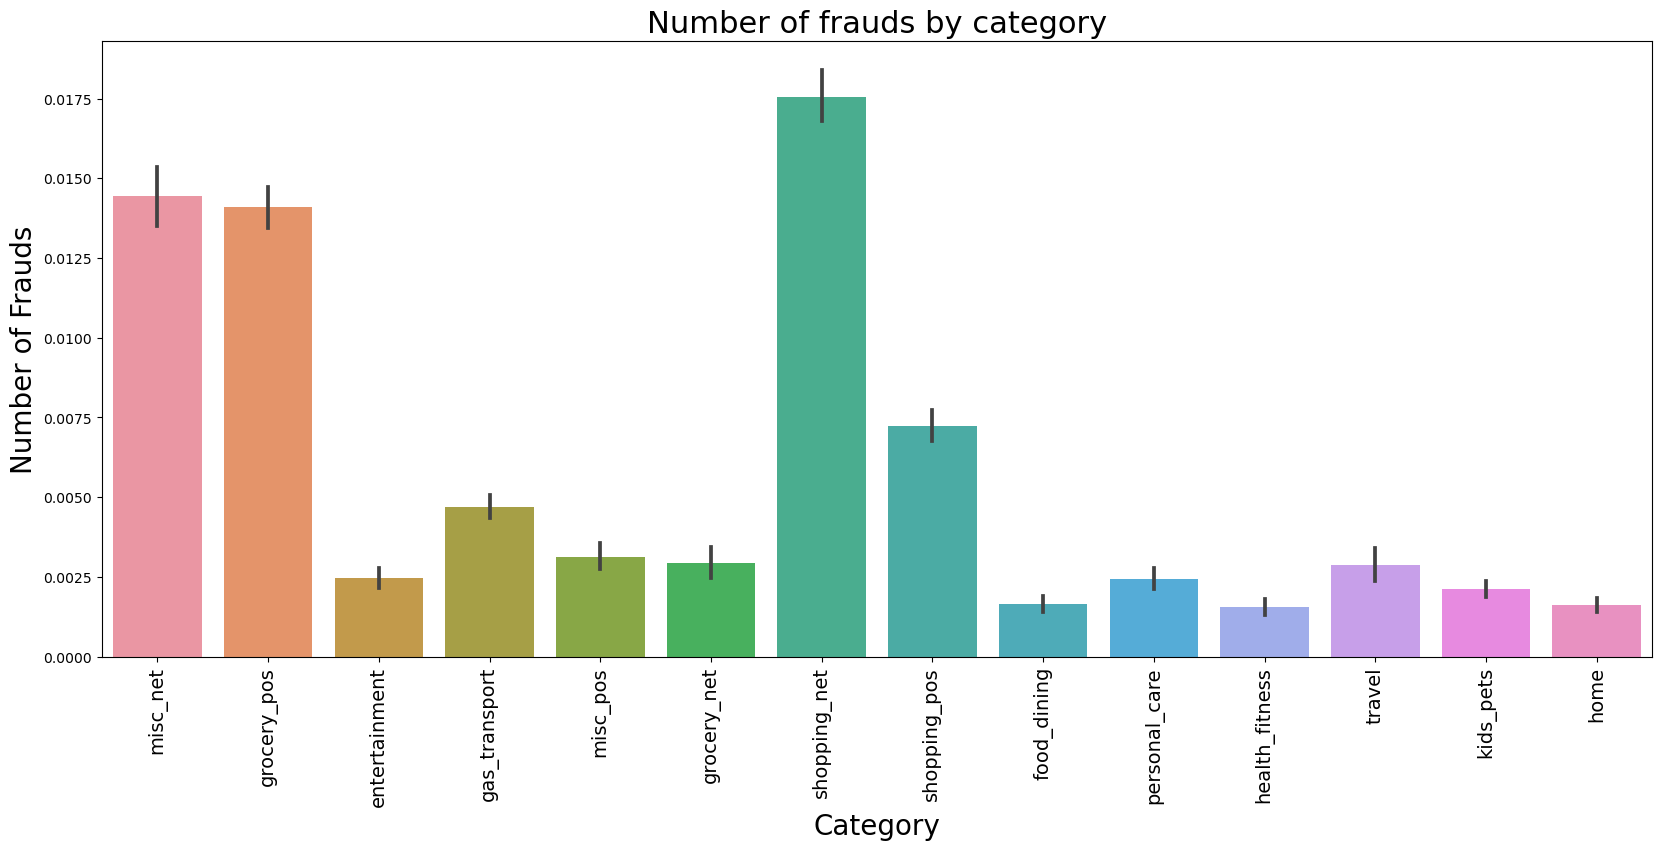

In [12]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category',fontsize=22)
sns.barplot(x="category", y='is_fraud' ,data=train_data)

plt.xlabel('Category', fontsize=20)
plt.ylabel('Number of Frauds', fontsize=20)
plt.xticks(rotation = 90,fontsize=14)

# Pre-processing and Downsampling the data

In [48]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Since the amount of data having is_fraud 0 and 1 are completely different ( one has large value another too small) so it can make overfitting

In [49]:
more_data = train_data[train_data.iloc[:,-1].values == 0]
less_data = train_data[train_data.iloc[:,-1].values == 1]
data_downsample = resample(more_data,n_samples=7506,random_state=42)
downsampled_data = pd.concat([data_downsample,less_data])

In [50]:
downsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 123118 to 1295733
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  

In [51]:
train_data = downsampled_data
downsampled_data['is_fraud'].value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

# Data Transformation

Adding new feature week_number, month_number, year from trans_date_trans_time feature

In [52]:
# train_data
train_data['trans_date_trans_time']=pd.to_datetime(train_data['trans_date_trans_time'])
train_data['week_number'] = train_data['trans_date_trans_time'].dt.dayofweek
train_data['month_number'] = train_data['trans_date_trans_time'].dt.month
train_data['year'] = train_data['trans_date_trans_time'].dt.year
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
123118,123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,...,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,1331349870,42.974691,-73.944930,0,6,3,2019
675160,675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,...,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,1350229247,41.046486,-74.132901,0,0,10,2019
133167,133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,...,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,1331738511,34.956184,-86.986784,0,3,3,2019
261154,261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,...,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,1336640660,46.851874,-97.269843,0,4,5,2019
111322,111322,2019-03-04 12:54:01,2356276337669917,fraud_Mayert Group,shopping_pos,5.89,Benjamin,Harris,M,0881 Lori Pines,...,Paediatric nurse,1981-02-15,4ea34c698a6a4ad782a74a051f136aca,1330865641,38.303450,-75.346029,0,0,3,2019


In [53]:
# test data
test_data['trans_date_trans_time']=pd.to_datetime(test_data['trans_date_trans_time'])
test_data['week_number'] = test_data['trans_date_trans_time'].dt.dayofweek
test_data['month_number'] = test_data['trans_date_trans_time'].dt.month
test_data['year'] = test_data['trans_date_trans_time'].dt.year

# Category (One Hot encoding)

Since, Category is Nominal Data, so it cannot work with model,So I will change category to numerical by One Hot Encoding

In [54]:
category_onehot= pd.get_dummies(train_data.category,prefix='category')
train_data = train_data.join(category_onehot)
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
126,126,2019-01-01 01:33:52,3567879740649740,fraud_Koss and Sons,gas_transport,58.79,Tanya,Williams,F,566 Megan Well,...,False,False,False,False,False,False,False,False,False,False
159,159,2019-01-01 01:56:51,30442439074871,"fraud_Parisian, Schiller and Altenwerth",misc_net,14.03,Linda,Sanchez,F,6574 William Hill Apt. 375,...,False,False,False,False,True,False,False,False,False,False
215,215,2019-01-01 02:38:49,4710826438164847414,fraud_Strosin-Cruickshank,grocery_pos,128.24,Juan,Henry,M,9795 Lori Island Suite 346,...,True,False,False,False,False,False,False,False,False,False
404,404,2019-01-01 05:19:42,4464457352619,fraud_Vandervort-Funk,grocery_pos,124.33,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,...,True,False,False,False,False,False,False,False,False,False
727,727,2019-01-01 09:27:35,3554849923339851,fraud_Larson-Moen,entertainment,65.74,John,Hudson,M,886 Nicole Key,...,False,False,False,False,False,False,False,False,False,False


In [55]:
category_onehot_test= pd.get_dummies(test_data.category,prefix='category')
test_data = test_data.join(category_onehot_test)
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,False,False,False,False,False,False,True,False,False,False
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,False,False,False,False,False,False,True,False,False,False
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,False,True,False,False,False,False,False,False,False,False
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,False,False,False,False,False,True,False,False,False,False
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,False,False,False,False,False,False,False,False,False,True


### Changing gender from nominal to numerical

In [56]:
# Train data
train_data['gender']=train_data['gender'].replace(['F','M'],[0,1])
# Test data
test_data['gender']=test_data['gender'].replace(['F','M'],[0,1])

### Converting merchant and job from textual data to numerical data using LabelEncoder

In [57]:
# Train data
lb = LabelEncoder()
merchant = train_data['merchant']
train_data['merchant_number'] = lb.fit_transform(merchant)
job = train_data['job']
train_data['job_number'] = lb.fit_transform(job)

#Test data
merchant_test = test_data['merchant']
test_data['merchant_number'] = lb.fit_transform(merchant_test)
job_test = test_data['job']
test_data['job_number'] = lb.fit_transform(job_test)

In [58]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,job_number
126,126,2019-01-01 01:33:52,3567879740649740,fraud_Koss and Sons,gas_transport,58.79,Tanya,Williams,0,566 Megan Well,...,False,False,False,False,False,False,False,False,332,354
159,159,2019-01-01 01:56:51,30442439074871,"fraud_Parisian, Schiller and Altenwerth",misc_net,14.03,Linda,Sanchez,0,6574 William Hill Apt. 375,...,False,False,True,False,False,False,False,False,475,478
215,215,2019-01-01 02:38:49,4710826438164847414,fraud_Strosin-Cruickshank,grocery_pos,128.24,Juan,Henry,1,9795 Lori Island Suite 346,...,False,False,False,False,False,False,False,False,608,205
404,404,2019-01-01 05:19:42,4464457352619,fraud_Vandervort-Funk,grocery_pos,124.33,Breanna,Rodriguez,0,118 Cabrera Springs Apt. 105,...,False,False,False,False,False,False,False,False,645,459
727,727,2019-01-01 09:27:35,3554849923339851,fraud_Larson-Moen,entertainment,65.74,John,Hudson,1,886 Nicole Key,...,False,False,False,False,False,False,False,False,376,58


### Calculating age from date of birth

In [59]:
from datetime import date
def calculate_age(row):
    today = date.today()
    return today.year -row['dob'].year -((today.month,today.day)<(row['dob'].month,row['dob'].day))
#Train data
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age']= train_data.apply(lambda row:calculate_age(row),axis  = 1)

#Test data
test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['age']= test_data.apply(lambda row:calculate_age(row),axis  = 1)
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,job_number,age
126,126,2019-01-01 01:33:52,3567879740649740,fraud_Koss and Sons,gas_transport,58.79,Tanya,Williams,0,566 Megan Well,...,False,False,False,False,False,False,False,332,354,65
159,159,2019-01-01 01:56:51,30442439074871,"fraud_Parisian, Schiller and Altenwerth",misc_net,14.03,Linda,Sanchez,0,6574 William Hill Apt. 375,...,False,True,False,False,False,False,False,475,478,42
215,215,2019-01-01 02:38:49,4710826438164847414,fraud_Strosin-Cruickshank,grocery_pos,128.24,Juan,Henry,1,9795 Lori Island Suite 346,...,False,False,False,False,False,False,False,608,205,59
404,404,2019-01-01 05:19:42,4464457352619,fraud_Vandervort-Funk,grocery_pos,124.33,Breanna,Rodriguez,0,118 Cabrera Springs Apt. 105,...,False,False,False,False,False,False,False,645,459,33
727,727,2019-01-01 09:27:35,3554849923339851,fraud_Larson-Moen,entertainment,65.74,John,Hudson,1,886 Nicole Key,...,False,False,False,False,False,False,False,376,58,75


# Select Data

In [60]:
select_data = train_data
select_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'week_number', 'month_number',
       'year', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'merchant_number',
       'job_number', 'age'],
      dtype='object')

In [61]:
select_data= select_data[['cc_num',
       'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'job_number',
       'week_number', 'month_number', 'year', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'merchant_number','is_fraud']]
select_data.head()

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,is_fraud
126,3567879740649740,58.79,0,13615,44.0577,-76.0196,1271,1325381632,44.015435,-76.027125,...,False,False,False,False,False,False,False,False,332,0
159,30442439074871,14.03,0,18433,41.5744,-75.5881,6508,1325383011,40.868184,-76.283066,...,False,False,True,False,False,False,False,False,475,0
215,4710826438164847414,128.24,1,59542,48.8328,-108.3961,192,1325385529,49.176720,-108.757243,...,False,False,False,False,False,False,False,False,608,0
404,4464457352619,124.33,0,32323,29.8826,-84.5964,217,1325395182,30.773425,-83.837856,...,False,False,False,False,False,False,False,False,645,0
727,3554849923339851,65.74,1,74074,36.1043,-97.0609,55345,1325410055,35.359894,-97.202209,...,False,False,False,False,False,False,False,False,376,0


### Using nlargest to select data

In [62]:
print(select_data.corr().abs().nlargest(15,'is_fraud').index)

Index(['is_fraud', 'amt', 'category_shopping_net', 'category_grocery_pos',
       'category_home', 'category_misc_net', 'category_kids_pets',
       'category_health_fitness', 'category_food_dining',
       'category_personal_care', 'month_number', 'category_entertainment',
       'age', 'category_misc_pos', 'gender'],
      dtype='object')


In [63]:
#Select train data
select_train_data =train_data[['amt', 'category_shopping_net', 'category_grocery_pos',
       'category_home', 'category_misc_net', 'category_kids_pets',
       'category_health_fitness', 'category_food_dining',
       'category_personal_care', 'month_number', 'category_entertainment',
       'age', 'category_misc_pos', 'gender','is_fraud']]

#Select test data
select_test_data =test_data[['amt', 'category_shopping_net', 'category_grocery_pos',
       'category_home', 'category_misc_net', 'category_kids_pets',
       'category_health_fitness', 'category_food_dining',
       'category_personal_care', 'month_number', 'category_entertainment',
       'age', 'category_misc_pos', 'gender','is_fraud']]
X_train = select_train_data[['amt', 'category_shopping_net', 'category_grocery_pos',
       'category_home', 'category_misc_net', 'category_kids_pets',
       'category_health_fitness', 'category_food_dining',
       'category_personal_care', 'month_number', 'category_entertainment',
       'age', 'category_misc_pos', 'gender']]
X_test = select_test_data[['amt', 'category_shopping_net', 'category_grocery_pos',
       'category_home', 'category_misc_net', 'category_kids_pets',
       'category_health_fitness', 'category_food_dining',
       'category_personal_care', 'month_number', 'category_entertainment',
       'age', 'category_misc_pos', 'gender']]
y_train = select_train_data['is_fraud']
y_test = select_test_data['is_fraud']

### Scaling train data

In [64]:
sc = preprocessing.MinMaxScaler()
newValue = sc.fit_transform(X_train)
X_train_scaler = pd.DataFrame(newValue,columns=X_train.columns)
X_train_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.003994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.580247,0.0,0.0
1,0.000900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.296296,0.0,0.0
2,0.008795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.506173,0.0,1.0
3,0.008524,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.185185,0.0,0.0
4,0.004474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.703704,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,0.004588,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.370370,0.0,1.0
15062,0.000635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.135802,0.0,1.0
15063,0.006693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.382716,0.0,0.0
15064,0.005938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.358025,0.0,0.0


In [65]:
newValue_test = sc.fit_transform(X_test)
X_test_scaler = pd.DataFrame(newValue_test, columns=X_test.columns)
X_test_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.456790,0.0,1.0
1,0.001267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.185185,0.0,0.0
2,0.001769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.432099,0.0,0.0
3,0.002594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,1.0,1.0
4,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617284,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.481481,0.0,1.0
555715,0.004868,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.061728,0.0,1.0
555716,0.003772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.283951,0.0,0.0
555717,0.000307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.481481,0.0,1.0


# Using Decision Tree Model to train data

In [66]:
dec_tree = DecisionTreeClassifier(criterion='gini',max_depth=20, random_state=42)

dec_tree.fit(X_train_scaler,y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

### Confusion Matrix

In [67]:
print("Confusion Matrix: ")
predictions = dec_tree.predict(X_test_scaler)
pd.DataFrame(confusion_matrix(y_test,predictions), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix: 


,Predicted Positive,Predicted Nagative
Actual Positive,526995,26579
Actual Negative,1612,533


## Classification Report

In [68]:
print("Classification report")
print(classification_report(y_test, predictions))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.02      0.25      0.04      2145

    accuracy                           0.95    555719
   macro avg       0.51      0.60      0.51    555719
weighted avg       0.99      0.95      0.97    555719

